# Training a perceptron

We consider again a neuron which receives two inputs $x_1$ and $x_2$. You should be already familiar with the following equations, but we recap them here for clarity. The neuron combines the inputs $x_i$ as 

\begin{equation}
s = \sum_{i=1}^2 w_i x_i + b
\end{equation}

And then passes this value through and activation function $f$ to compute the output

\begin{equation}
\hat{y} = f(s)
\end{equation}

Before proceeding, notice that we are using a slightly different notation with respect to the previous lectures. This is done in order to maintain consistency with the notation used in the lecture on backpropagation, which deals with how neural networks are trained, and is thus more closely releated with the material here. Here $x_i$ is the $i^{th}$ input, $w_i$ is the synaptic weight of the $i^{th}$ input, $b$ is the bias, $s$ is the weighted sum of inputs computed at the neuron, and $\hat{y}$ is the output (i.e. the activation) of the neuron, after the weighted sum $s$ has been passed through the transfer function $f$. Also notice that the bias now appears with a positive sign ($+b$ instead of $-b$): this, however, should not confuse you, since from a modeling point of view the bias is just a constant that allows to move the activation threshold of our neuron, so this is just a matter of notation (if we have $+b$, increasing the bias will move the threshold up, if we have $-b$ increasing the bias will move the threshold down)

In the previous practical we were able to manually adjust the weights to get the right output, by a sort of trial and error procedure. In this tutorial we are going to understand a principled way by which synaptic connections can be updated such that the neuron can produce the desired output. For this to work, we clearly need to know what this desired output is: we call this desired output the _target_ $y$. This allows us to compute an error, which measures the mismatch between the output of our neuron, and our desired output. The error (more commonly referred to as the _loss_ in the machine learning world) can be defined in various ways. Here, we use the following

\begin{equation}
L = \frac{1}{2}(\hat{y}-y)^2
\end{equation}

Our neuron is going to implement the `hardlim` transfer function.

\begin{equation}
\hat{y} = f(s) = 
\left\{\begin{matrix}
1 & \mathrm{if} \, s>0\\ 
0 & \mathrm{otherwise}
\end{matrix}\right.
\end{equation}

Equipped with this function, this simple network corresponds to one of the very first neural networks ever introduced, the so-called *perceptron*. This neuron behaves as a *classifier*: it either responds (i.e. it outputs 1) or does nothing (i.e. it outputs 0), which means it is ideal for grouping input into two classes. 

We can think of the inputs $x_1$ and $x_2$ as representing some feature of the environment, such as the distance and the aggressiveness of an animal present in the visual field. Based on these inputs, the neuron can 'decide' whether the situation is dangerous or not. 

## Part 1 - The perceptron learning rule

We are now going to try and understand how we can change the synaptic weights of our perceptron in a principled way. For this part, we focus on a single input $x$ and a single weight $w$.

### Question 1
Suppose you have the following values for the input $x$, the output $\hat{y}$, and the target $y$.
\begin{align}
x &= 0.5 \\
\hat{y} &= 1 \\
y &= 0 \\
\end{align}
In which direction should the weight $w$ change such that our output becomes closer to the desired output? i.e. should $w$ increase ($\Delta w > 0$) or decrease ($\Delta w < 0$)?

### Answer 1
[your answer]

### Question 2
Consider now this set of values:
\begin{align}
x &= -0.5 \\
\hat{y} &= 1 \\
y &= 0 \\
\end{align}
In which direction should the weight change this time?

### Answer 2
[your answer]

### Question 3
Consider
\begin{align}
x &= 0.5 \\
\hat{y} &= 0 \\
y &= 1 \\
\end{align}
In which direction should the weight change this time?

### Answer 3
[your answer]

### Question 4
Consider
\begin{align}
x &= -0.5 \\
\hat{y} &= 0 \\
y &= 1 \\
\end{align}
In which direction should the weight change this time?

### Answer 4
[your answer]

You probably realized that the sign of the input $x$ matters for how we should change the weight (if not, go back and check your answers again!). And of course the difference between output and target $e=(y-\hat{y})$ also matters. The cases that were presented above can be summarized in the following table: 

| $e$    | $x$      | $\Delta w$|
| ----------:|:------:| -----:|
| > 0         | > 0    |    ?   |
| > 0         | < 0    |    ?   |
| < 0         | > 0    |    ?   |
| < 0         | < 0    |    ?   |

### Question 5
Complete the table in the answer cell below.

### Answer 5
| $e$    |$x$      | $\Delta w$|
| ----------:|:------:| -----:|
| > 0         | > 0    |       |
| > 0         | < 0    |       |
| < 0         | > 0    |       |
| < 0         | < 0    |       |

### Question 6
So, the table tells us in which direction we should change $w$ given the signs of $e$ and $x$. What function of $f(e, x)$ achieves this behavior?

_Hint:_ try $\Delta w = e + x$. Do you get the desired behavior?

### Answer 6
[your answer]

If you were able to answer the previous question correctly, you came to the conclusion that $\Delta w = e \times x = (y-\hat{y})x$. While this may not seem like much, you have actually just deduced the __perceptron learning rule__, as you can see on [Wikipedia](https://en.wikipedia.org/wiki/Perceptron). 

We forgot one thing though: the bias! We need to learn that too!

### Question 7
Fill out the update table for the bias in the answer cell below.

_Hint:_ think carefully whether the bias update should depend on $e$ and/or on $x$.

### Answer 7
| $e$    | $b$      | $\Delta b$|
| ----------:|:------:| -----:|
| > 0         | > 0    |       |
| > 0         | < 0    |       |
| < 0         | > 0    |       |
| < 0         | < 0    |       |

You hopefully came to the conclusion that we need to change the bias based only on $e$, and in fact it turns out that in the perceptron, we generally use $\Delta b = e = (y-\hat{y})$. We are now fully equipped to _train_ our neuron to classify data. 

There's one last element that we are missing, which is the *learning rate*. Essentially, we can modulate *how much* we change our parameters (the weights and the bias) for each new data point that we observe. We want to avoid that when see a new data point we drastically change our parameters (potentially erasing what we learned before), rather we want to make small adjustments at every new observation. The learning rate, which we call $\alpha$, is generally (but not necessarily) treated as a *hyperparameter*, meaning that we don't learn it from our data, but we manually set it to a value. So our full parameter update becomes: 

\begin{align}
w &= w + \alpha \Delta w = w + \alpha (y-\hat{y})x \\
b &= b + \alpha \Delta b = b + \alpha (y-\hat{y})
\end{align}


## Part 2 - Training a perceptron

Let's first generate some data: run the cell below which will generate and plot data.  

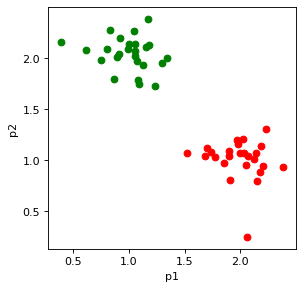

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 80
import seaborn as sns
from sklearn.datasets import make_blobs

cluster_std = [[0.2, 0.2], [0.2, 0.2]]
centers     = [[1, 2], [2, 1]]
X, y = make_blobs(n_samples=50, n_features=2, cluster_std=cluster_std,
                  centers=centers,shuffle=True)
f, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.scatter(X[y == 0, 0], X[y == 0, 1], color='g')
ax.scatter(X[y == 1, 0], X[y == 1, 1], color='r')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
plt.show()

In the plot above, every dot represents a combination of values of $x_1$ and $x_2$. The color indicated whether our neuron should output a 0 or a 1 for that combination. To continue the analogy of $x_1$ and $x_2$ representing features of a visual scene, the red dots correspond to situations which our neuron should classify as dangerous.

Now we are good to go. In this simulation, we are going to train our neuron using the equations for $\Delta w$ and $\Delta b$ you derived. This is going to work as follows: we loop through every point in the dataset, we know what our neuron outputs ($\hat{y}$), and we know what the output _should_ be $(y)$. This means that for every data point $x$ we can compute $\Delta w$ and $\Delta b$ and update our synapses and bias as

\begin{align}
w_i &= w_i + \alpha \Delta w_i = w_i + \alpha(y-\hat{y})x_i \\
b &= b + \alpha \Delta b = b + \alpha(y-\hat{y})
\end{align}

Every time we observe a new data point, we can update our parameters accordingly. In the simulation, we loop over our dataset and for every data point update weights and bias. After every update we plot the _decision boundary_  and the _training accuracy_ (the number of points in our dataset that are classified correctly given the current weight and bias). 

### Question 1
Run the cell below, press 'Initialize' to initialize the simulation and 'Train' to launch the training procedure. Does the neuron learn the correct classification?

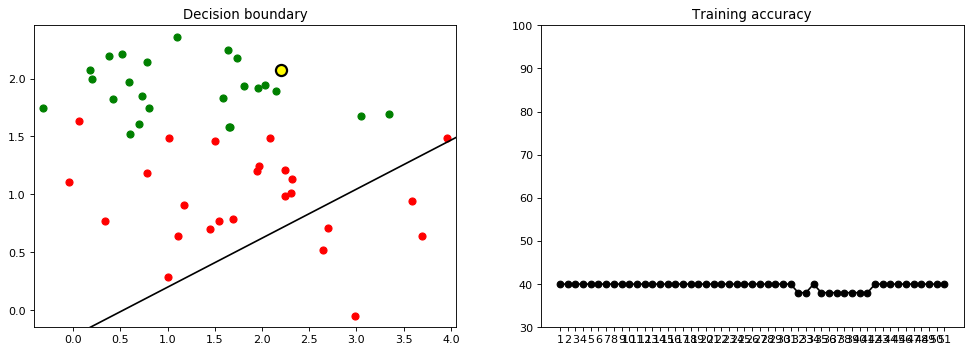

In [2]:
from utils_assignment_3 import Neuron, mlp_simulation
sim = mlp_simulation(X, y, learning_rate=0.000001)
sim.start()

### Answer 1
[your answer]

### Question 2
We now change the distribution of our data: run the cell below and initialize the simulation. Do you think that the classification problem became easier or harder?

In [4]:
cluster_std = [[1, 0.3], [1, 0.3]]
centers     = [[1, 2], [2, 1]]
X, y = make_blobs(n_samples=50, n_features=2, cluster_std=cluster_std,
                  centers=centers,shuffle=True)
sim = mlp_simulation(X, y, learning_rate=0.00001)
sim.start()

### Answer 2
[your answer]

### Question 3

You can see that if your run the simulation multiple times, it will converge to different solutions. So given the same classification problem and the same inputs we will not get the same weights. What are 2 sources of this variability? (hint: think about how the network initializes and trains)

### Answer 3
[your answer]

### Question 4

What could be a weakness of this learning algorithm? Think about how the network updates its weight and bias!

### Answer 4
[your answer]

### Segway to the next assignment:
As in the previous assigment, we are dealing with a _linear classifier_. Let's generate some more complicated data distribution, and see how our perceptron fails.

In [ ]:
from sklearn.datasets import make_moons, make_circles
X, y = make_moons(n_samples=50, shuffle=True, noise=0.05)

sim = mlp_simulation(X, y, learning_rate=0.0005)
sim.start()